#### This code gets all the monthly data from yahoo finance for a list of tickers.  We chose a monthly timeframe because a lot of the data we want to compare it is also in a monthly format.

In [1]:
    import datetime
    import time
    import urllib.request
    import pandas as pd
    import numpy as np

#### The following function retrieves all historical data in yahoo finance back to 1/1/1980 for a particular ticker.  It returns a dataframe for one ticker.  If data doesn't go back as far as 1980 for the ticker, data will be returned as far back as possible.  

In [4]:
def get_df_from_yahoo_finance (symbol): 

    end_date = datetime.datetime.now()
    end_date = int(round(end_date.timestamp())) * 1000  #<-- Convert datetime to milliseconds 
    end_date_str = str(end_date)
    end_date_str = end_date_str[:10]  #<-- This removes all but the last 10 millisecond values for the time which is format yahoo wants

    start_date_str = '345427200'
  

    ticker_dataframe = {}
    

    # Build Yahoo finance URL for the data request.
    
    yahoo_finance_url_with_symbol = ('https://query1.finance.yahoo.com/v7/finance/download/' + str(symbol)
                                     + '?period1=' + str(start_date_str) + '&period2=' + str(end_date_str)
                                     + '&interval=1mo&events=history&includeAdjustedClose=true')

    url2 = urllib.request.urlopen(yahoo_finance_url_with_symbol) #request data (comes as CSV)
    
    ticker_dataframe = pd.read_csv(url2)  #convert CSV in memory from the Yahoo request to dataframe
    ticker_dataframe.insert(1, "Ticker", symbol)

    return (ticker_dataframe)


#### This next section iterates through the list of tickers and appends them all to one dataframe as rows.  Add additonal tickers to the list_of_tickers_for_yahoo_data_dump list object.  

In [136]:

list_of_tickers_for_yahoo_data_dump = ['SPY', 'GLD', 'XLE', 'XLV', 'XLP', 'QQQ', 'AMT', 'VNQ', 'VPU', 'DJP', 'BND','^VIX', 'JPM']   # <-- Add tickers here

tickers_and_data_df = pd.DataFrame({})

for ticker in list_of_tickers_for_yahoo_data_dump:
    
    single_ticker_df = get_df_from_yahoo_finance(ticker)
    tickers_and_data_df = pd.concat([tickers_and_data_df, single_ticker_df])


#### Print the new dataframe --> tickers_and_data_df.

In [124]:
print (tickers_and_data_df)   #View the dataframe we just created

          Date   Ticker          Open          High           Low  \
0   1993-02-01      SPY     43.968750     45.125000     42.812500   
1   1993-03-01      SPY     44.562500     45.843750     44.218750   
2   1993-04-01      SPY     45.250000     45.250000     43.281250   
3   1993-05-01      SPY     44.093750     45.656250     43.843750   
4   1993-06-01      SPY     45.375000     45.812500     44.218750   
..         ...      ...           ...           ...           ...   
91  2022-05-01  BTC-USD  37713.265625  39902.949219  26350.490234   
92  2022-06-01  BTC-USD  31792.554688  31957.285156  17708.623047   
93  2022-07-01  BTC-USD  19820.470703  24572.580078  18966.951172   
94  2022-08-01  BTC-USD  23336.718750  23578.650391  22485.701172   
95  2022-08-06  BTC-USD  23298.335938  23321.167969  23199.273438   

           Close     Adj Close         Volume  
0      44.406250     25.709478        5417600  
1      45.187500     26.161781        3019200  
2      44.031250     25.612

#### To view a dataframe of a single ticker use the following

In [74]:
btc_df = tickers_and_data_df.loc[tickers_and_data_df['Ticker'] == 'SPY']
print(btc_df)

           Date Ticker        Open        High         Low       Close  \
0    1993-02-01    SPY   43.968750   45.125000   42.812500   44.406250   
1    1993-03-01    SPY   44.562500   45.843750   44.218750   45.187500   
2    1993-04-01    SPY   45.250000   45.250000   43.281250   44.031250   
3    1993-05-01    SPY   44.093750   45.656250   43.843750   45.218750   
4    1993-06-01    SPY   45.375000   45.812500   44.218750   45.062500   
..          ...    ...         ...         ...         ...         ...   
351  2022-05-01    SPY  412.070007  429.660004  380.540009  412.929993   
352  2022-06-01    SPY  415.170013  417.440002  362.170013  377.250000   
353  2022-07-01    SPY  376.559998  413.029999  371.040009  411.989990   
354  2022-08-01    SPY  409.149994  415.679993  406.820007  413.470001   
355  2022-08-05    SPY  409.660004  414.140015  409.609985  413.470001   

      Adj Close      Volume  
0     25.709488     5417600  
1     26.161787     3019200  
2     25.612782     2

In [137]:
pivot = pd.pivot_table(
    data=tickers_and_data_df,
    index='Date',
    columns ='Ticker',
    
)

pivot = pivot.dropna()


In [118]:
from pathlib import Path  
filepath = Path('data/pivot.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
pivot.to_csv(filepath)  

In [138]:
pivot = pivot['Close']

In [139]:
pivot


Ticker,AMT,BND,DJP,GLD,JPM,QQQ,SPY,VNQ,VPU,XLE,XLP,XLV,^VIX
Date,,,,,,,,,,,,,
2007-05-01,43.180000,74.769997,51.549999,65.540001,51.830002,47.410000,153.320007,78.949997,87.500000,68.300003,27.770000,36.730000,13.050000
2007-06-01,42.000000,74.279999,50.759998,64.269997,48.450001,47.599998,150.429993,70.949997,82.500000,68.989998,27.049999,35.310001,16.230000
2007-07-01,41.660000,74.730003,51.689999,65.790001,44.009998,47.529999,145.720001,65.089996,79.070000,69.000000,26.280001,33.630001,23.520000
2007-08-01,39.619999,75.529999,49.820000,66.519997,44.520000,48.869999,147.589996,69.480003,81.349998,69.830002,26.900000,34.400002,23.379999
2007-09-01,43.540001,75.690002,53.779999,73.510002,45.820000,51.410000,152.580002,71.459999,83.010002,74.800003,27.980000,35.349998,18.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,256.130005,76.680000,39.459999,171.139999,132.229996,308.279999,412.929993,99.070000,161.710007,87.199997,74.470001,132.229996,26.190001
2022-06-01,255.589996,75.260002,34.799999,168.460007,112.610001,280.279999,377.250000,91.110001,152.350006,71.510002,72.180000,128.240005,28.709999
2022-07-01,270.829987,76.900002,36.220001,164.100006,115.360001,315.459991,411.989990,98.959999,161.050003,78.419998,74.489998,132.399994,21.330000


In [140]:
pct_change = pivot.pct_change().dropna()
pct_change.head()

Ticker,AMT,BND,DJP,GLD,JPM,QQQ,SPY,VNQ,VPU,XLE,XLP,XLV,^VIX
Date,,,,,,,,,,,,,
2007-06-01,-0.027327,-0.006553,-0.015325,-0.019378,-0.065213,0.004008,-0.018850,-0.101330,-0.057143,0.010102,-0.025927,-0.038660,0.243678
2007-07-01,-0.008095,0.006058,0.018322,0.023650,-0.091641,-0.001471,-0.031310,-0.082593,-0.041576,0.000145,-0.028466,-0.047579,0.449168
2007-08-01,-0.048968,0.010705,-0.036177,0.011096,0.011588,0.028193,0.012833,0.067445,0.028835,0.012029,0.023592,0.022896,-0.005952
2007-09-01,0.098940,0.002118,0.079486,0.105081,0.029200,0.051975,0.033810,0.028497,0.020406,0.071173,0.040149,0.027616,-0.230111
2007-10-01,0.014699,0.005417,0.034585,0.069514,0.025753,0.070414,0.013567,0.020991,0.064571,0.025401,0.015368,0.018670,0.029444


<AxesSubplot:xlabel='Date'>

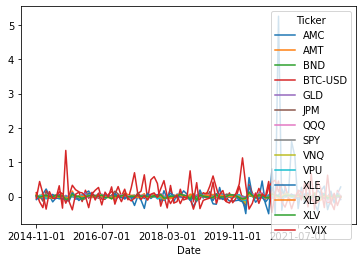

In [13]:
pct_change.plot()

In [130]:
std = pct_change.std()
std

Ticker
AMT        0.056939
BND        0.011630
BTC-USD    0.230131
DJP        0.049346
GLD        0.040299
JPM        0.069256
QQQ        0.052979
SPY        0.043950
VNQ        0.048296
VPU        0.041162
XLE        0.091262
XLP        0.035729
XLV        0.041636
^VIX       0.304954
dtype: float64

In [131]:
std['DJP']

0.049345683022116144

In [132]:
annualized_std_btc = std['BTC-USD']*np.sqrt(12)
display(annualized_std_btc)
annualized_std_spy = std['SPY']*np.sqrt(12)
display(annualized_std_spy)
annualized_std_djp = std['DJP']*np.sqrt(12)
display(annualized_std_djp)

0.7971973168305474

0.15224730563459818

0.1709384602569882

In [27]:
average_annual_return_btc = pct_change['BTC-USD'].mean()*12
display(average_annual_return_btc)
average_annual_return_spy = pct_change['SPY'].mean()*12
display(average_annual_return_spy)
average_annual_return_dbc = pct_change['DBC'].mean()*12
display(average_annual_return_dbc)

0.839520536058747

0.10375635448716597

0.16599805918252386

In [28]:
sharpe_ratio_btc = average_annual_return_btc/annualized_std_btc
display(sharpe_ratio_btc)
sharpe_ratio_spy = average_annual_return_spy/annualized_std_spy
display(sharpe_ratio_spy)
sharpe_ratio_dbc = average_annual_return_dbc/annualized_std_dbc
display(sharpe_ratio_dbc)


1.0525701277441795

0.6815258343359079

1.0903618033004883

In [150]:
def sharpe_ratio_calculator(list):
    for ticker in list:
        annualized_std = std[ticker]*np.sqrt(12)
        average_annual_return = pct_change[ticker].mean()*12
        sharpe_ratio = average_annual_return/annualized_std
        print(f"{ticker} sharpe ratio = {sharpe_ratio}")
        

SyntaxError: invalid syntax (3386458498.py, line 3)

In [151]:
sharpe_ratio_calculator(list_of_tickers_for_yahoo_data_dump)

SPY sharpe ratio = 0.5085274889545385
GLD sharpe ratio = 0.5397582149750112
XLE sharpe ratio = 0.13645327878371438
XLV sharpe ratio = 0.6489399871827042
XLP sharpe ratio = 0.5827738084557771
QQQ sharpe ratio = 0.7802440300229637
AMT sharpe ratio = 0.7051494941626452
VNQ sharpe ratio = 0.24616349607293253
VPU sharpe ratio = 0.35177573949083923
DJP sharpe ratio = -0.04851246631766833
BND sharpe ratio = 0.04524417480391808
^VIX sharpe ratio = 0.3719602673327361
JPM sharpe ratio = 0.3908136670808444


<AxesSubplot:xlabel='BTC-USD', ylabel='SPY'>

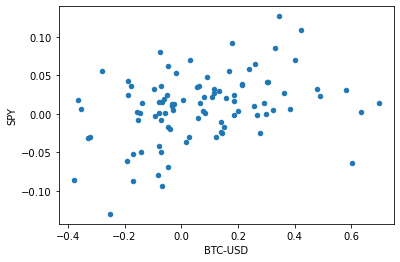

In [39]:
pct_change.plot(kind='scatter', x= 'BTC-USD', y='SPY')

<AxesSubplot:xlabel='BTC-USD', ylabel='SPY'>

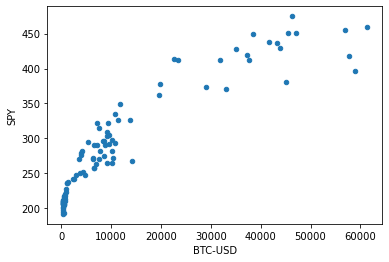

In [40]:
pivot.plot(kind='scatter', x ='BTC-USD', y='SPY')

In [143]:
pct_change.corr()

Ticker,AMT,BND,DJP,GLD,JPM,QQQ,SPY,VNQ,VPU,XLE,XLP,XLV,^VIX
Ticker,,,,,,,,,,,,,
AMT,1.000000,0.272023,0.193723,0.110867,0.119339,0.480631,0.447332,0.469640,0.506798,0.184770,0.478442,0.483653,-0.378617
BND,0.272023,1.000000,-0.051144,0.409567,-0.108571,0.147783,0.146783,0.313222,0.303684,-0.020366,0.207824,0.174038,-0.126930
DJP,0.193723,-0.051144,1.000000,0.377712,0.304174,0.382936,0.496565,0.345848,0.303191,0.679760,0.330066,0.324464,-0.312442
GLD,0.110867,0.409567,0.377712,1.000000,-0.099696,0.044563,0.068424,0.108175,0.161023,0.087920,0.138065,0.128110,-0.030400
JPM,0.119339,-0.108571,0.304174,-0.099696,1.000000,0.530860,0.668295,0.553164,0.128228,0.452201,0.416682,0.488082,-0.388696
QQQ,0.480631,0.147783,0.382936,0.044563,0.530860,1.000000,0.919404,0.645942,0.455302,0.538044,0.616746,0.719513,-0.636821
SPY,0.447332,0.146783,0.496565,0.068424,0.668295,0.919404,1.000000,0.747295,0.549483,0.682775,0.752613,0.810776,-0.703448
VNQ,0.469640,0.313222,0.345848,0.108175,0.553164,0.645942,0.747295,1.000000,0.565517,0.434529,0.640966,0.604227,-0.489967
VPU,0.506798,0.303684,0.303191,0.161023,0.128228,0.455302,0.549483,0.565517,1.000000,0.331265,0.633731,0.519707,-0.500231


<AxesSubplot:xlabel='Date'>

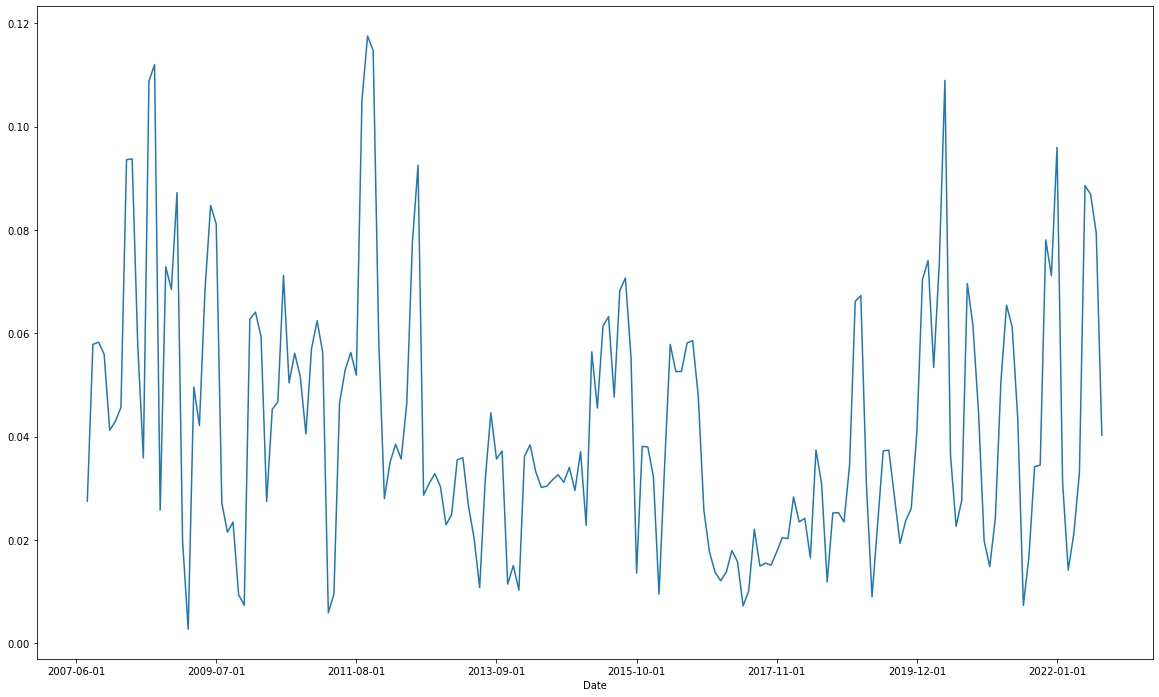

In [144]:
pct_change['DJP'].rolling(window=3).std().plot(figsize=(20,12))

<AxesSubplot:xlabel='Date'>

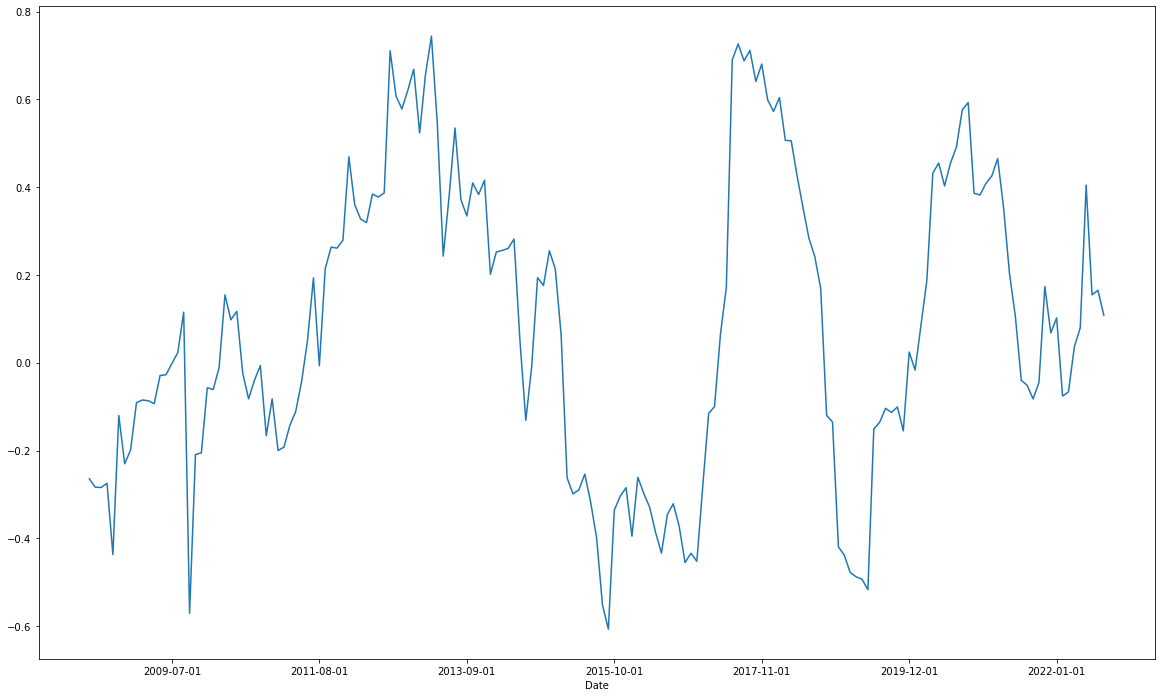

In [149]:
# pct_change['BTC-USD'].rolling(window=3).corr(pct_change['SPY']).plot(figsize=(20,12))
pct_change['GLD'].rolling(window=12).corr(pct_change['QQQ']).plot(figsize=(20,12))

In [59]:
pct_change['BTC-USD'].corr(pct_change['SPY'])

0.34934020989533776

In [61]:
pivot['BTC-USD'].corr(pivot['SPY'])

0.9171618966193156